In [1]:
import json
from __future__ import division

196,531,736 Unique Posts contained in the set

In [2]:
%%time
gildedPosts = []
top_gilded = 0
top_post = None
with open("C:/Users/jeroe/Documents/torrents/RS_full_corpus.json") as f:
    i = 0
    for line in f:
        i += 1
        try:
            line_json = json.loads(line)
            if line_json['gilded'] >= 1:
                gildedPosts.append(line_json)
                if gilded > top_gilded:
                    top_post = line
                    top_gilded = gilded
        except:
            continue
        if i%1e6==0:
            print i
        if i>20e6:
            break
    print str(i)+' lines read.'
    print 'Done!'

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
20000001 lines read.
Done!
Wall time: 14min 38s


In [3]:
len(gildedPosts)

29

<Container object of 27 artists>

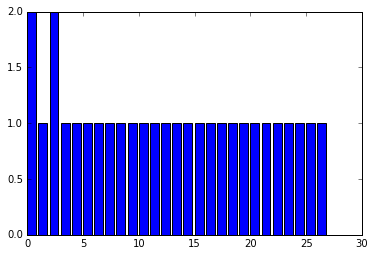

In [21]:
hist = {}
for p in gildedPosts:
    try:
        hist[p['score']] += 1
    except KeyError:
        hist[p['score']] = 1
fig, ax = plt.subplots()
ax.bar(range(len(hist)), hist.values())

In [22]:
for p in gildedPosts:
    print p['permalink']

/r/reddit.com/comments/74xlq/cool_google_search/
/r/lolcats/comments/80ww8/lolyomomma_joke/
/r/Winnipeg/comments/8a0zh/ninja_bombs_winnipeg_square_main_attraction_at_050/
/r/pics/comments/8aqjh/awww_this_is_just_too_sad_pic/
/r/Winnipeg/comments/8iflc/homeless_man_saves_teen_from_drowning/
/r/pics/comments/92dd8/test_post_please_ignore/
/r/WTF/comments/9br1q/if_you_rob_a_bank_you_may_get_a_few_thousand/
/r/atheism/comments/9fg1b/atheism_vs_theism_may_seem_like_a_battle_of_wits/
/r/Bacon/comments/an596/exciting_new_way_of_cooking_bacon_with_pictures/
/r/hiphopheads/comments/awt41/welcome_to_rhiphopheads/
/r/funny/comments/axcht/diet_coke_is_unhealthy/
/r/programming/comments/b0a2z/a_reddit_clone_in_two_evenings_and_666_lines_of/
/r/gonewild/comments/bipv5/a_tame_look_at_my_top_for_you/
/r/gaming/comments/ceuyh/step_by_step_moddingguide_deus_ex_i_spilled_my/
/r/politics/comments/cjbl7/white_nationalists_are_trying_to_invade_reddit/
/r/gaming/comments/d1osj/final_fantasy_guitar_man_insane

In [8]:
with open('reddit_corpus_gilded_posts.json', 'w') as f:
    json.dump(gildedPosts, f)

In [12]:
with open('reddit_corpus_top_post.json', 'w') as f:
    json.dump(json.loads(top_post), f)

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            ax.spines['left'].set_color('none')
            ax.spines['bottom'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

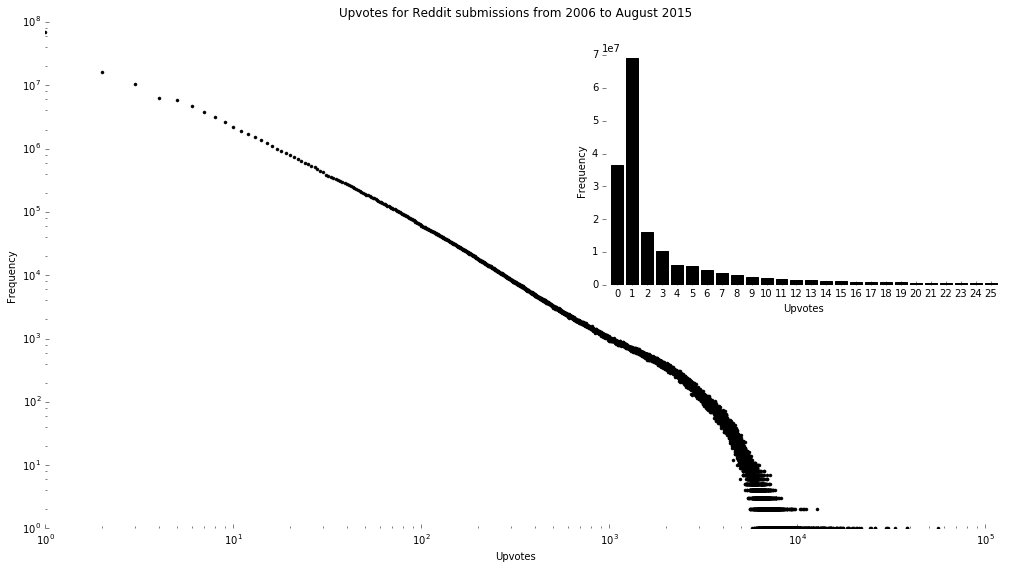

In [87]:
plt.figure(figsize=(14,8))
plt.title('Upvotes for Reddit submissions from 2006 to August 2015')
ax = plt.subplot(111)
ax.plot(hist.keys(), hist.values(), '.', c='black')
ax.set_ylabel('Frequency')
ax.set_xlabel('Upvotes')
ax.set_yscale('log')
ax.set_xscale('log')

a = plt.axes([.6, .5, .4, .4])
plt.bar(hist.keys()[:26], hist.values()[:26], color='black', align='center')
plt.ylabel('Frequency')
plt.xlabel('Upvotes')
plt.xlim([-1, 26])
plt.xticks(range(26))

plt.tight_layout()
hide_spines()
plt.savefig('plot.svg')
plt.savefig('plot.png')
plt.show()

In [78]:
a = hist[1] / sum(hist.values())
print str(a*100)+'% of Reddit submissions have 1 upvote'

35.0629813803% of Reddit submissions have 1 upvote
